# Matching of spatially homogeneous non-stationary space–times to vacuum in cylindrical symmetry by Tod and Mena
##  Geoff Cope
##  Univeristy of Utah
##  𐐏𐐭𐑌𐐲𐑂𐐲𐑉𐑅𐐮𐐻𐐨 𐐲𐑂 𐐏𐐭𐐻𐐫
##  January 25, 2022

Here we concentrate on metric 7 with the field equations given in the appenix as equations 32-37.  Currently missing two constraint equations

https://arxiv.org/abs/gr-qc/0405102

In [43]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [44]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [45]:
T,r,rho,phi,z,dT,dr,dphi,dz,drho = symbols('T r rho phi z dT dr dphi dz drho')

In [46]:
psi = Function('psi')(rho,T)
psi

In [47]:
gamma = Function('gamma')(rho,T)
gamma

In [48]:
#  Here we use lower case r and reserve upper case R for Ricci
r = Function('r')(rho,T)
r

In [49]:
W = Function('W')(rho,T)
W

In [50]:
variables = Matrix([T,rho,phi,z])
variables

⎡T⎤
⎢ ⎥
⎢ρ⎥
⎢ ⎥
⎢φ⎥
⎢ ⎥
⎣z⎦

In [51]:
differentials = Matrix([dT,drho,dphi,dz])
differentials 

⎡ dT ⎤
⎢    ⎥
⎢drho⎥
⎢    ⎥
⎢dphi⎥
⎢    ⎥
⎣ dz ⎦

In [52]:
lineElement = expand( exp(2*(gamma-psi))*(-dT**2 + drho**2) +  ( r**2 * exp(-2*psi) * dphi**2 ) + exp(2*psi)*(dz + W*dphi)**2) 
lineElement

In [53]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡  2⋅γ(ρ, T)  -2⋅ψ(ρ, T)                                                                    
⎢-ℯ         ⋅ℯ                      0                                 0                     
⎢                                                                                           
⎢                          2⋅γ(ρ, T)  -2⋅ψ(ρ, T)                                            
⎢           0             ℯ         ⋅ℯ                                0                     
⎢                                                                                           
⎢                                                  2        2⋅ψ(ρ, T)    2        -2⋅ψ(ρ, T)
⎢           0                       0             W (ρ, T)⋅ℯ          + r (ρ, T)⋅ℯ          
⎢                                                                                           
⎢                                                                      2⋅ψ(ρ, T)            
⎣           0                       0                         W(ρ, T)⋅

In [54]:
import sympy

In [55]:
m = sympy.Array(g)
m

⎡  2⋅γ(ρ, T)  -2⋅ψ(ρ, T)                                                                    
⎢-ℯ         ⋅ℯ                      0                                 0                     
⎢                                                                                           
⎢                          2⋅γ(ρ, T)  -2⋅ψ(ρ, T)                                            
⎢           0             ℯ         ⋅ℯ                                0                     
⎢                                                                                           
⎢                                                  2        2⋅ψ(ρ, T)    2        -2⋅ψ(ρ, T)
⎢           0                       0             W (ρ, T)⋅ℯ          + r (ρ, T)⋅ℯ          
⎢                                                                                           
⎢                                                                      2⋅ψ(ρ, T)            
⎣           0                       0                         W(ρ, T)⋅

In [56]:
from einsteinpy.symbolic import *

In [57]:
syms = sympy.symbols("T rho phi z")
T,rho,phi,z = syms

In [58]:
metric = MetricTensor(m,syms)

In [59]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢⎡∂             ∂            ∂             ∂                                                
⎢⎢──(γ(ρ, T)) - ──(ψ(ρ, T))  ──(γ(ρ, T)) - ──(ψ(ρ, T))                                      
⎢⎢∂T            ∂T           ∂ρ            ∂ρ                                               
⎢⎢                                                                                          
⎢⎢∂             ∂            ∂             ∂                                                
⎢⎢──(γ(ρ, T)) - ──(ψ(ρ, T))  ──(γ(ρ, T)) - ──(ψ(ρ, T))                                      
⎢⎢∂ρ            ∂ρ           ∂T            ∂T                         

In [60]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡  ⎛                                                                                        
⎢  ⎜∂           ∂             ∂           ∂             ∂           ∂             ∂         
⎢2⋅⎜──(γ(ρ, T))⋅──(r(ρ, T)) + ──(γ(ρ, T))⋅──(r(ρ, T)) + ──(ψ(ρ, T))⋅──(r(ρ, T)) - ──(ψ(ρ, T)
⎢  ⎜∂T          ∂T            ∂ρ          ∂ρ            ∂T          ∂T            ∂ρ        
⎢  ⎝                                                                                        
⎢───────────────────────────────────────────────────────────────────────────────────────────
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                  ⎛                  

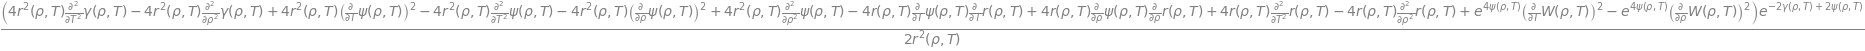

In [61]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [62]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡  ⎛                                                                                        
⎢  ⎜∂           ∂             ∂           ∂             ∂           ∂             ∂         
⎢2⋅⎜──(γ(ρ, T))⋅──(r(ρ, T)) + ──(γ(ρ, T))⋅──(r(ρ, T)) + ──(ψ(ρ, T))⋅──(r(ρ, T)) - ──(ψ(ρ, T)
⎢  ⎜∂T          ∂T            ∂ρ          ∂ρ            ∂T          ∂T            ∂ρ        
⎢  ⎝                                                                                        
⎢───────────────────────────────────────────────────────────────────────────────────────────
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [63]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [64]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

In [65]:
ricciSimplified = simplify(Ric.tensor())
ricciSimplified

⎡  ⎛                                                                                        
⎢  ⎜∂           ∂             ∂           ∂             ∂           ∂             ∂         
⎢2⋅⎜──(γ(ρ, T))⋅──(r(ρ, T)) + ──(γ(ρ, T))⋅──(r(ρ, T)) + ──(ψ(ρ, T))⋅──(r(ρ, T)) - ──(ψ(ρ, T)
⎢  ⎜∂T          ∂T            ∂ρ          ∂ρ            ∂T          ∂T            ∂ρ        
⎢  ⎝                                                                                        
⎢───────────────────────────────────────────────────────────────────────────────────────────
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                  ⎛                  

In [66]:
einsteinSimplified = simplify(einst.tensor())
einsteinSimplified

⎡                                                                                           
⎢                                                                                           
⎢                                        ∂           ∂                 ∂           ∂        
⎢               2                2   1.0⋅──(γ(ρ, T))⋅──(r(ρ, T))   1.0⋅──(γ(ρ, T))⋅──(r(ρ, T
⎢  ⎛∂          ⎞    ⎛∂          ⎞        ∂T          ∂T                ∂ρ          ∂ρ       
⎢- ⎜──(ψ(ρ, T))⎟  - ⎜──(ψ(ρ, T))⎟  + ─────────────────────────── + ─────────────────────────
⎢  ⎝∂T         ⎠    ⎝∂ρ         ⎠              r(ρ, T)                       r(ρ, T)        
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢            ⎛                                                       2

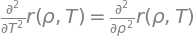

In [155]:
equation33 = Eq( diff(r,T,T),solve( expand(r*(einsteinSimplified[0,0] - einsteinSimplified[1,1]) ), diff(r,T,T) )[0] ) 
equation33

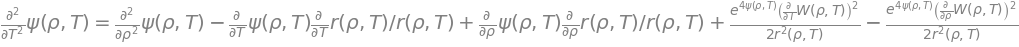

In [75]:
equation34 = Eq(diff(psi,T,T), expand(solve( ricciSimplified[3,3].args[1], diff(psi,T,T) )[0] ) )
equation34

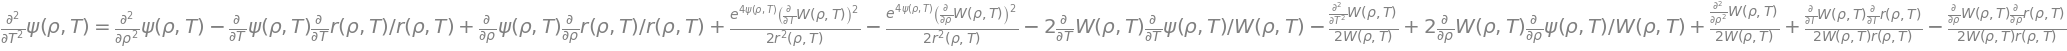

In [91]:
d2psidt2 = Eq( diff(psi,T,T), expand( solve( ricciSimplified[2,3].args[2], diff(psi,T,T) )[0] ) )
d2psidt2

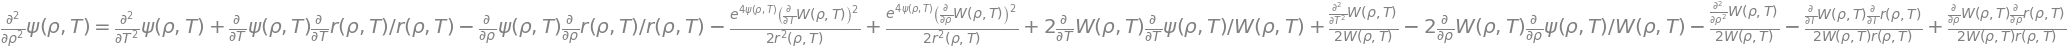

In [116]:
d2psidrho2 = Eq(diff(psi,rho,rho), expand(solve( ricciSimplified[2,3].args[2], diff(psi,rho,rho) )[0] ) )
d2psidrho2

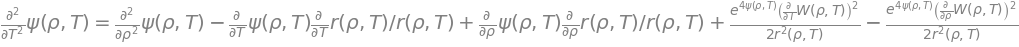

In [162]:
equation34 = Eq(diff(psi,T,T), expand( solve( ricciSimplified[3,3].args[1], diff(psi,T,T) )[0] ) ) 
equation34

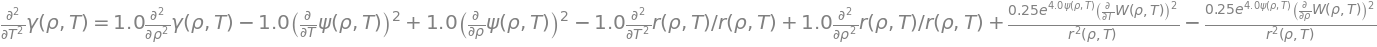

In [132]:
#  This gamma gamma, psi, and r
d2gammadt2 = Eq( diff(gamma,T,T), expand( solve( einsteinSimplified[3,3].args[1].subs(equation34.lhs,equation34.rhs).simplify(), diff(gamma,T,T) )[0] ))
d2gammadt2

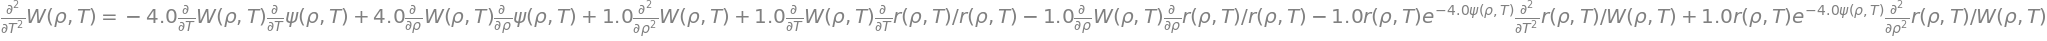

In [139]:
equation35 = Eq( diff(W,T,T), expand(expand( solve( einsteinSimplified[2,2].args[2].subs(d2gammadt2.lhs,d2gammadt2.rhs), diff(W,T,T) )[0] )).subs(equation34.lhs,equation34.rhs)).simplify()
equation35

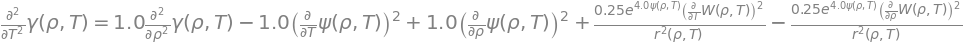

In [163]:
equation32 = Eq( diff(gamma,T,T),expand(solve( einsteinSimplified[2,3].args[1].subs(equation35.lhs,equation35.rhs).subs(equation34.lhs,equation34.rhs).subs(equation33.lhs,equation33.rhs), diff(gamma,T,T) )[0]))
equation32 

In [165]:
vacuumFieldEquations = Matrix([equation32,equation33,equation34,equation35])
vacuumFieldEquations

⎡                                                                                           
⎢                                                                                           
⎢                                              2                  2                         
⎢                                             ∂                  ∂             ⎛∂          ⎞
⎢                                            ───(γ(ρ, T)) = 1.0⋅───(γ(ρ, T)) - ⎜──(ψ(ρ, T))⎟
⎢                                              2                  2            ⎝∂T         ⎠
⎢                                            ∂T                 ∂ρ                          
⎢                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                     